# Introduction to Linear Regression

*Adapted from [Kevin Markham](https://github.com/justmarkham)'s exellent example. *

*Which was itself adapted from Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*


## Motivation

Why are we learning linear regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

## Libraries

Will be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes** since it has some nice characteristics for linear modeling. However, we recommend that you spend most of your energy on [scikit-learn](http://scikit-learn.org/stable/) since it provides significantly more useful functionality for machine learning in general.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

# make sure pandas will show all of our columns in wide data tables
pd.set_option('display.max_columns', 500)

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [171]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [172]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

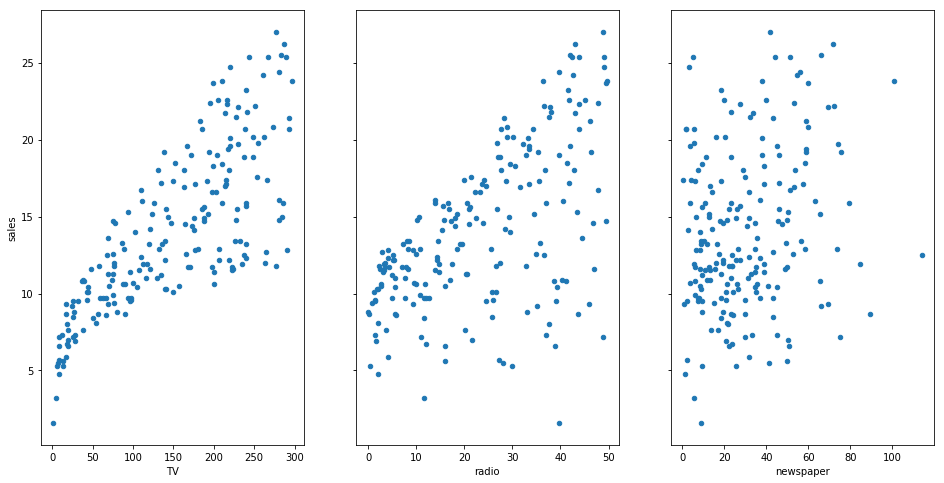

In [173]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

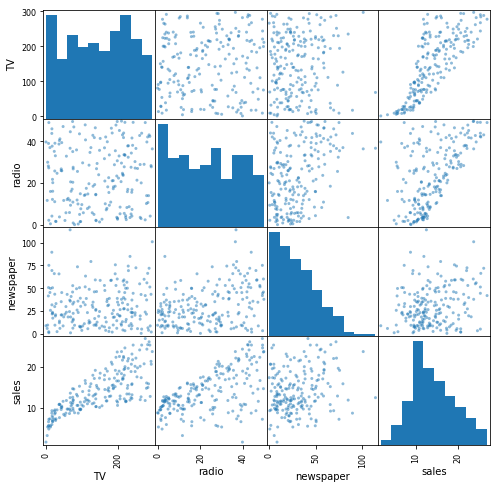

In [174]:
# Visualize the relationships between all measures
_ = pd.plotting.scatter_matrix(data, figsize=(8,8))

In [175]:
# check to see how correlated the variables are
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

Let's use **Statsmodels** to estimate the model coefficients for the advertising data:

In [176]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 11 Feb 2018   Prob (F-statistic):           1.47e-42
Time:                        21:01:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Same thing in **sklearn**.

In [177]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(data[['TV']], data[['sales']])
reg.coef_

array([[ 0.04753664]])

In [178]:
reg.intercept_

array([ 7.03259355])

## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [179]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

Of course, we can also use Statsmodels to make the prediction:

In [180]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [181]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    9.409426
dtype: float64

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [182]:
# create a DataFrame with the minimum and maximum values of TV
X_min_max = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_min_max.head()

,TV
0,0.7
1,296.4


In [183]:
# make predictions for those x values and store them
preds = lm.predict(X_min_max)
preds

0     7.065869
1    21.122454
dtype: float64

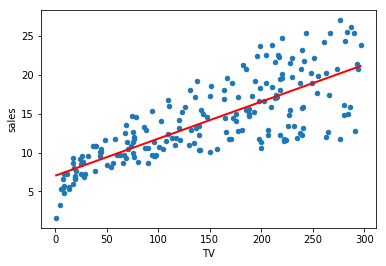

In [184]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_min_max, preds, c='red', linewidth=2)

In [185]:
data[['TV']].head()

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8


Now let's examine the residuals.

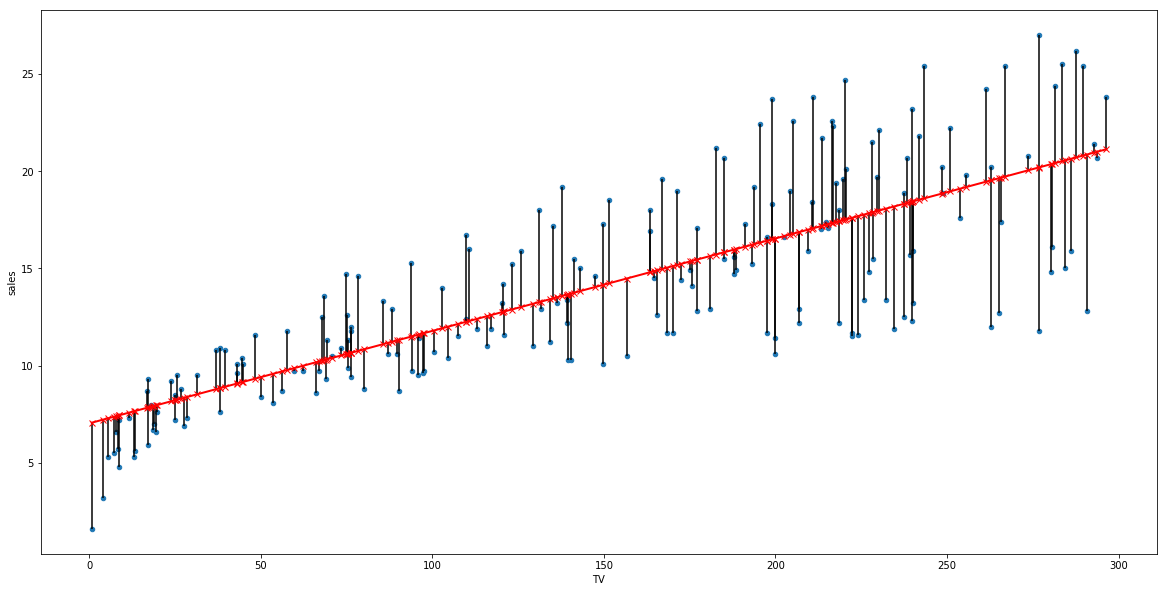

In [186]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales',figsize=[20,10])

# then, plot the least squares line
plt.plot(X_min_max, preds, c='red', linewidth=2)

# plot the predictions
plt.plot(data[['TV']], lm.predict(data[['TV']]),'x', c="red")

# plot the residuals
plt.vlines(data['TV'],data['sales'],lm.predict(data[['TV']]))

In [187]:
lm.rsquared

0.61187505085007099

## Confidence in our Model

Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [188]:
# print the confidence intervals for the model coefficients
ci = lm.conf_int()
ci

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

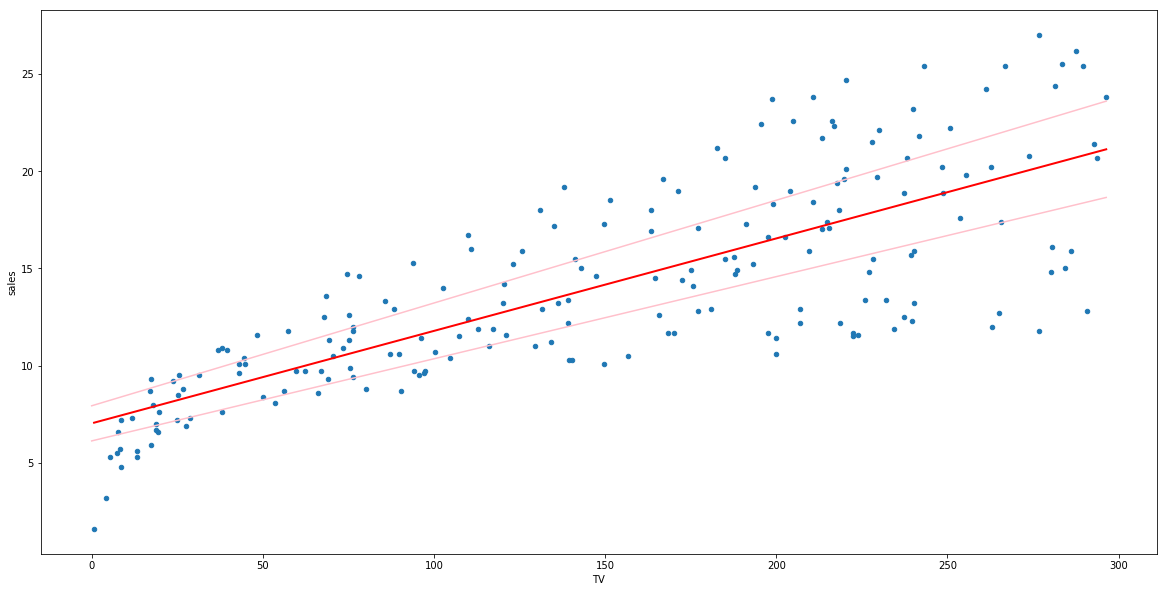

In [189]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales',figsize=[20,10])

# then, plot the least squares line
plt.plot(X_min_max, preds, c='red', linewidth=2)

# then plot the min and max CIs
plt.plot([0, data.TV.max()],
         [ci[0]['Intercept'], ci[0]['Intercept'] + data.TV.max()*ci[0]['TV']], c='pink')
plt.plot([0, data.TV.max()],
         [ci[1]['Intercept'], ci[1]['Intercept'] + data.TV.max()*ci[1]['TV']], c='pink')



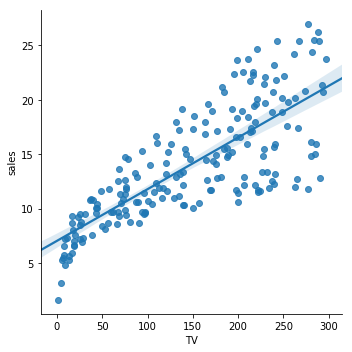

In [190]:
# same thing in Seaborn
import seaborn as sns

sns.lmplot(x='TV', y='sales', data=data, order=1)
#sns.jointplot(data.TV, data.sales, kind='reg', order=1)  # try this too!

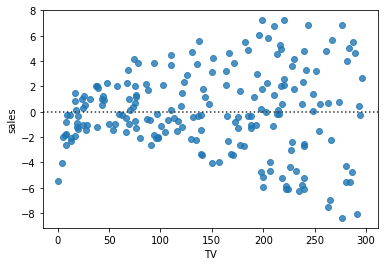

In [191]:
# Hard to get actual values, but can plot the residuals
sns.residplot(x="TV", y="sales", data=data);

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

Let's calculate the R-squared value for our simple linear model:

In [192]:
# print the R-squared value for the model
lm.rsquared

0.61187505085007099

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

## Fitting a polynomial model

In [193]:
# create a fitted model in one line
pm2 = smf.ols(formula='sales ~ np.power(TV,6) +np.power(TV,5) +np.power(TV,4) +np.power(TV,3) + np.power(TV,2) + TV', data=data).fit()

# print the coefficients
pm2.params

Intercept          4.936237e-02
np.power(TV, 6)   -1.580161e-12
np.power(TV, 5)    1.640608e-09
np.power(TV, 4)   -6.582064e-07
np.power(TV, 3)    1.278956e-04
np.power(TV, 2)   -1.232823e-02
TV                 5.803490e-01
dtype: float64

In [194]:
# print the R-squared value for the model
pm2.rsquared

0.622928139106533

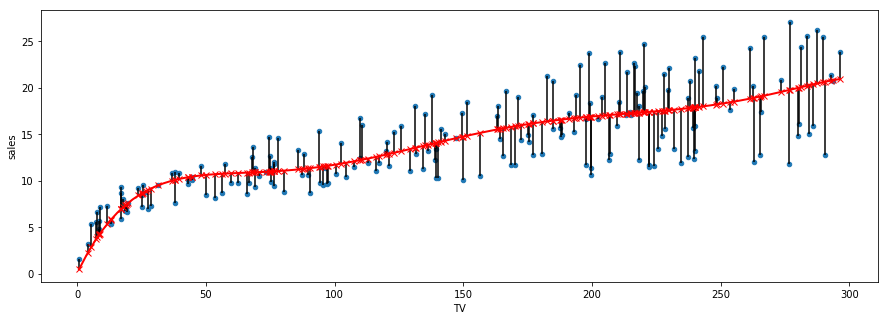

In [195]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales',figsize=[15,5])

# then, plot the least squares line
x_vals = pd.DataFrame({'TV':np.linspace(data.TV.min(), data.TV.max(), 100)})
plt.plot(x_vals,pm2.predict(x_vals), c='red', linewidth=2)

# plot the predictions
plt.plot(data[['TV']], pm2.predict(data[['TV']]),'x', c="red")

# plot the residuals
plt.vlines(data['TV'],data['sales'],pm2.predict(data[['TV']]))

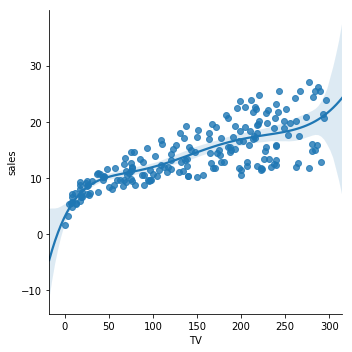

In [196]:
# In Seaborn
sns.lmplot(x='TV', y='sales', data=data, order=6)

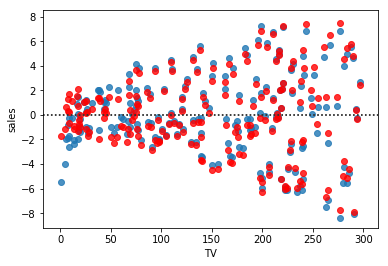

In [197]:
# Hard to get actual values, but can plot the residuals
sns.residplot(x="TV", y="sales", data=data);
sns.residplot(x="TV", y="sales", data=data, order=6, color='red');

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [198]:
# create a fitted model with all three features
mlm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
mlm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [199]:
# print a summary of the fitted model
mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 11 Feb 2018   Prob (F-statistic):           1.58e-96
Time:                        21:02:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we *might* reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do I decide **which features to include** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [166]:
# only include TV and Radio in the model
mlm2 = smf.ols(formula='sales ~ TV + radio', data=data).fit()
mlm2.rsquared

NameError: name 'data' is not defined

In [167]:
# add Newspaper to the model (which we believe has no association with Sales)
mlm2 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
mlm2.rsquared

NameError: name 'data' is not defined

# NBA player performance (Datathon)
Another fun dataset to play with.

In [13]:
nba_data = pd.DataFrame.from_csv("NBA 2015-16 stats.csv")
nba_data.head()

,Player,Id,Position,Age,Team,GamesPlayed,GamesStarted,MinutesPlayed,FieldGoals,FieldGoalAtts,FieldGoalPct,ThreePtrs,ThreePtrsAtt,ThreePtrsPct,TwoPtrs,TwoPtrsAtt,TwoPtrsPct,eFG%,FreeThrows,FreeThrowAtt,FreeThrowPct,ReboundsOffense,ReboundsDefense,ReboundsTotal,Assists,Steals,Blocks,TurnoverPct,PersonalFouls,Points
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Quincy Acy,acyqu01,PF,25,SAC,59,29,876,119,214,0.556,19,49,0.388,100,165,0.606,0.600,50,68,0.735,65,123,188,27,29,24,27,103,307
2,Jordan Adams,adamsjo01,SG,21,MEM,2,0,15,2,6,0.333,0,1,0.000,2,5,0.400,0.333,3,5,0.600,0,2,2,3,3,0,2,2,7
3,Steven Adams,adamsst01,C,22,OKC,80,80,2014,261,426,0.613,0,0,NaN,261,426,0.613,0.613,114,196,0.582,219,314,533,62,42,89,84,223,636
4,Arron Afflalo,afflaar01,SG,30,NYK,71,57,2371,354,799,0.443,91,238,0.382,263,561,0.469,0.500,110,131,0.840,23,243,266,144,25,10,82,142,909
5,Alexis Ajinca,ajincal01,C,27,NOP,59,17,861,150,315,0.476,0,1,0.000,150,314,0.478,0.476,52,62,0.839,75,194,269,31,19,36,54,134,352


In [ ]:
nba1 = nba_data.sample(100)
nba2 = nba_data.sample(100)

In [ ]:
_ = nba_data.hist(figsize=(20,10))

Let's look at just a subset of the stats

In [ ]:
nba_data.sort_values(by="Points", ascending=False)[["Player","GamesPlayed","MinutesPlayed","ThreePtrsPct","TwoPtrsPct","FreeThrowPct"]].head(10)

Let's model Free Throw % using (Three Point %, Two Point %, Minutes Played, and Games Played)

In [161]:
lm_nba = smf.ols(formula='FreeThrowPct ~ ThreePtrsPct + TwoPtrsPct + MinutesPlayed + GamesPlayed', data=nba_data).fit()

# print the coefficients & r2 value
print(lm_nba.params)
print("R2=" + str(lm_nba.rsquared))
lm_nba.summary()

Intercept        0.709718
ThreePtrsPct     0.116918
TwoPtrsPct      -0.003215
MinutesPlayed    0.000034
GamesPlayed     -0.000617
dtype: float64
R2=0.0431283184668


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FreeThrowPct   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     5.634
Date:                Sun, 11 Feb 2018   Prob (F-statistic):           0.000193
Time:                        20:27:41   Log-Likelihood:                 357.10
No. Observations:                 505   AIC:                            -704.2
Df Residuals:                     500   BIC:                            -683.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7097      0.037     18.976      0.000       0.636       0.783
ThreePtrsPct      0.1169      0.041      2.848      0.005       0.036       0.198
TwoPtrsPct       -0.0032      0.072     -0.045      0.964      -0.145       0.139
MinutesPlayed  3.446e-05    1.3e-05      2.645      0.008    8.86e-06    6.01e-05
GamesPlayed      -0.0006      0.000     -1.364      0.173      -0.002       0.000
==============================================================================
Omnibus:                      122.067   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.149
Skew:                          -1.040   Prob(JB):                    2.01e-105
Kurtosis:                       7.312   Cond. No.                     2.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dummy Variables
Now let's try to model Free Throw Percentage using Three Point %, which worked well last time, and Position.

Because Position is a categorical variable with several possible values (n=5), this is actually equivalent to creating a set of n-1 new binary variables.

In [45]:
# Filter to remove players who played multiple positions
nba_pos_data = nba_data.sort_values(by="Points", ascending=False)[["Player","Position","ThreePtrsPct","FreeThrowPct"]]
nba_pos_data = nba_pos_data[(nba_pos_data["Position"] == "SG") | (nba_pos_data["Position"] == "PG") | (nba_pos_data["Position"] == "SF") | (nba_pos_data["Position"] == "PF") | (nba_pos_data["Position"] == "C")]
nba_pos_data.head()

,Player,Position,ThreePtrsPct,FreeThrowPct
Rk,,,,
177,James Harden,SG,0.359,0.860
105,Stephen Curry,PG,0.454,0.908
126,Kevin Durant,SF,0.387,0.898
221,LeBron James,SF,0.309,0.731
266,Damian Lillard,PG,0.375,0.892


Now lets fit a model by position:

In [46]:
lm_nba_pos = smf.ols(formula='FreeThrowPct ~ ThreePtrsPct + Position', data=nba_pos_data).fit()

# print the coefficients
print(lm_nba_pos.params)
lm_nba_pos.summary()

Intercept         0.694601
Position[T.PF]   -0.005357
Position[T.PG]    0.059126
Position[T.SF]    0.033505
Position[T.SG]    0.049104
ThreePtrsPct      0.091312
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FreeThrowPct   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     7.029
Date:                Thu, 08 Feb 2018   Prob (F-statistic):           2.31e-06
Time:                        18:21:19   Log-Likelihood:                 363.01
No. Observations:                 505   AIC:                            -714.0
Df Residuals:                     499   BIC:                            -688.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6946      0.016     43.462      0.000       0.663       0.726
Position[T.PF]    -0.0054      0.019     -0.277      0.782      -0.043       0.033
Position[T.PG]     0.0591      0.019      3.129      0.002       0.022       0.096
Position[T.SF]     0.0335      0.020      1.687      0.092      -0.006       0.073
Position[T.SG]     0.0491      0.020      2.512      0.012       0.011       0.088
ThreePtrsPct       0.0913      0.042      2.199      0.028       0.010       0.173
==============================================================================
Omnibus:                      120.780   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.435
Skew:                          -1.071   Prob(JB):                     5.06e-92
Kurtosis:                       6.923   Cond. No.                         9.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Datathon Questions

## Question 1
Which two player statistics appear to be the most postively correlated with one another? Which two are most negatively correlated?

What if you only consider players who played more than 1000 minutes?

Most Positively Correlated = 0.991681485657
Most Negatively Correlated = -0.241525122941


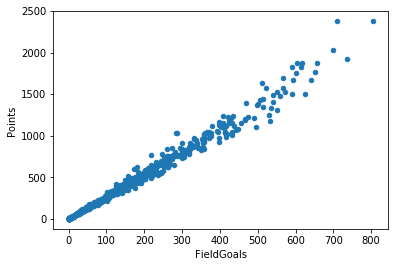

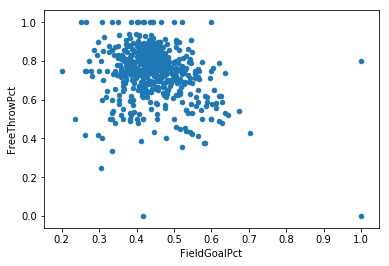

In [2]:

nba_data = pd.DataFrame.from_csv("NBA 2015-16 stats.csv")


nba_corr = nba_data.corr()
nba_pos = nba_corr.copy()
nba_neg = nba_corr.copy()

nba_pos = nba_pos[nba_pos >0.99]
nba_pos = nba_pos[nba_pos <1.0]


print("Most Positively Correlated = "+ str(nba_pos["FieldGoals"]["Points"]))

#nba_pos = pd.melt(nba_pos, value_vars=["MinutesPlayed" + str(nba_pos.index), "FieldGoals", "FieldGoalAtts","FieldGoalPct", "ThreePtrs", "ThreePtrsAtt", "Points"], var_name="col", value_name="correlation")
nba_data[["Points","FieldGoals"]].plot(kind="scatter",x="FieldGoals", y="Points") 

nba_neg = nba_neg[nba_neg <0]

nba_neg
print("Most Negatively Correlated = " + str(nba_neg["FieldGoalPct"]["FreeThrowPct"] ))
nba_data[["FreeThrowPct","FieldGoalPct"]].plot(kind="scatter",x="FieldGoalPct", y="FreeThrowPct") 
  
   


Most Positively Correlated = 0.986496211386
Most Negatively Correlated = -0.501417024976


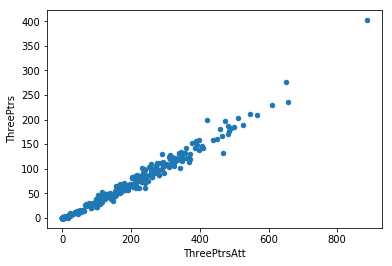

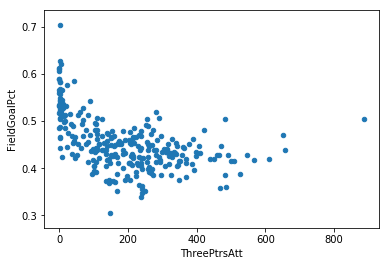

In [3]:
nba_data = pd.DataFrame.from_csv("NBA 2015-16 stats.csv")
 ####################################################################
nba_data = nba_data[(nba_data["MinutesPlayed"] > 1000)]
nba_corr1 = nba_data.corr()
nba_pos = nba_corr1.copy()
nba_neg = nba_corr1.copy()

nba_pos = nba_pos[nba_pos >0.986]
nba_pos = nba_pos[nba_pos <1.0]
nba_pos
print("Most Positively Correlated = " + str(nba_neg["ThreePtrsAtt"]["ThreePtrs"] ))
#nba_pos = pd.melt(nba_pos, value_vars=["MinutesPlayed" + str(nba_pos.index), "FieldGoals", "FieldGoalAtts","FieldGoalPct", "ThreePtrs", "ThreePtrsAtt", "Points"], var_name="col", value_name="correlation")
nba_data[["ThreePtrsAtt","ThreePtrs"]].plot(kind="scatter",x="ThreePtrsAtt", y="ThreePtrs") 

#nba_neg = nba_neg[nba_neg <-0.5] #look at the data first then pick values


#nba_neg

print("Most Negatively Correlated = " + str(nba_neg["ThreePtrsAtt"]["FieldGoalPct"] ))
nba_data[["ThreePtrsAtt","FieldGoalPct"]].plot(kind="scatter",x="ThreePtrsAtt", y="FieldGoalPct") 

## Question 2
Is there a relationship between Field Goal Percentage and Free Throw Percentage? 

Does it change based on a player's position?

Intercept         1.035177
Position[T.PF]    0.013711
Position[T.PG]    0.033037
Position[T.SF]    0.020401
Position[T.SG]    0.042500
FieldGoalPct     -0.661740
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FreeThrowPct   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     19.40
Date:                Mon, 12 Feb 2018   Prob (F-statistic):           1.49e-16
Time:                        20:51:46   Log-Likelihood:                 309.51
No. Observations:                 282   AIC:                            -607.0
Df Residuals:                     276   BIC:                            -585.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0352      0.060     17.318      0.000       0.918       1.153
Position[T.PF]     0.0137      0.017      0.788      0.431      -0.021       0.048
Position[T.PG]     0.0330      0.019      1.701      0.090      -0.005       0.071
Position[T.SF]     0.0204      0.019      1.067      0.287      -0.017       0.058
Position[T.SG]     0.0425      0.020      2.149      0.033       0.004       0.081
FieldGoalPct      -0.6617      0.111     -5.969      0.000      -0.880      -0.443
==============================================================================
Omnibus:                       16.108   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.513
Skew:                          -0.503   Prob(JB):                     9.55e-05
Kurtosis:                       3.752   Cond. No.                         30.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

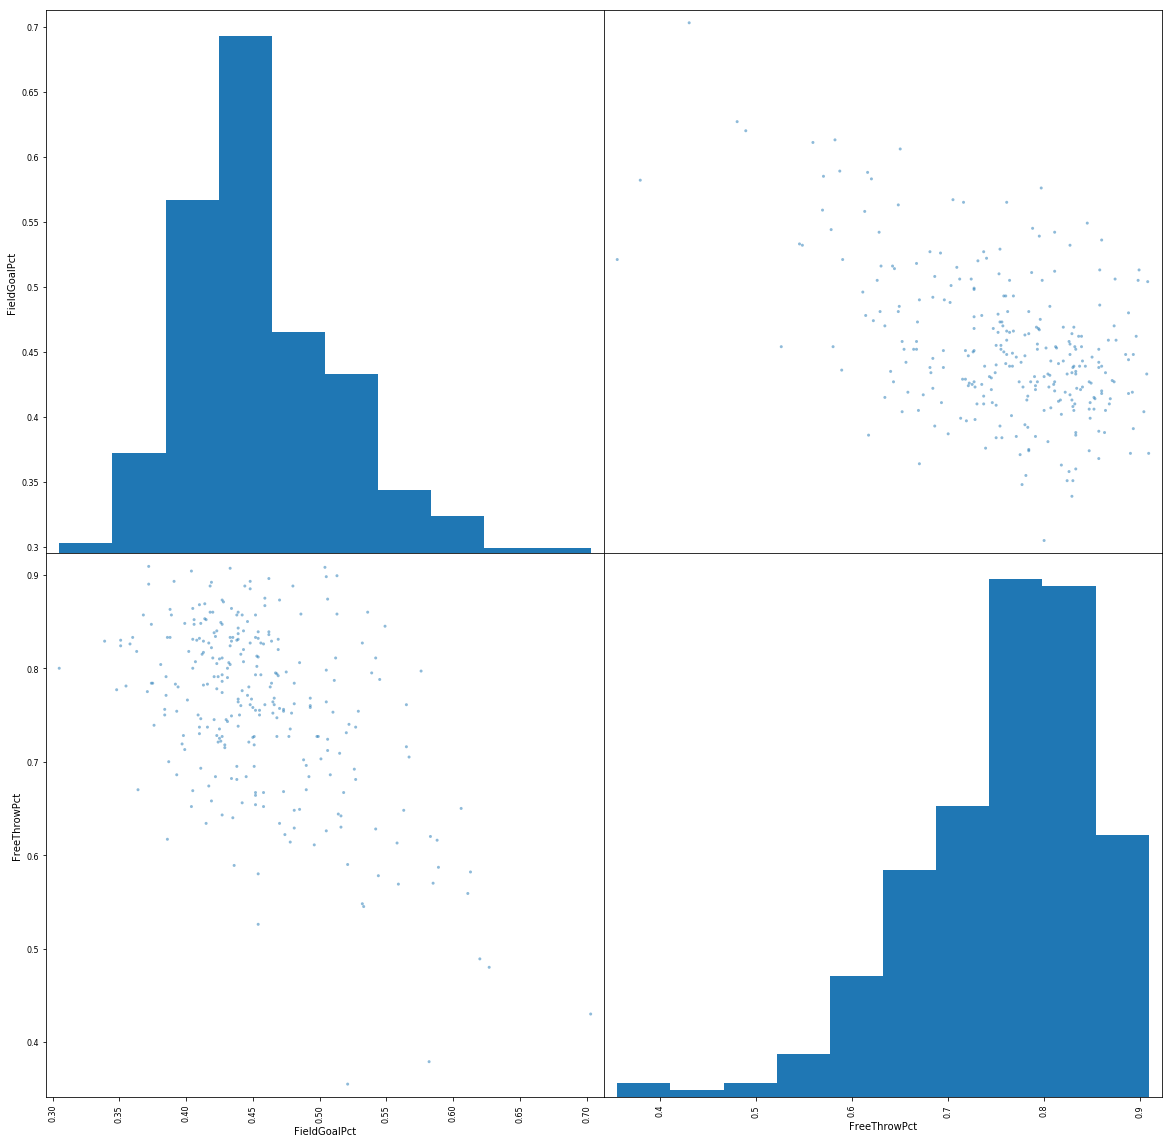

In [4]:
#have to do regression analysis
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

nba_rel = nba_data[['FieldGoalPct', 'FreeThrowPct']]
_ = pd.plotting.scatter_matrix(nba_rel, figsize=(20,20))
nba_rel.corr()

# Filter to remove players who played multiple positions
nba_pos_data = nba_data.sort_values(by="Points", ascending=False)[["Player","Position","FieldGoalPct","FreeThrowPct"]]
nba_pos_data = nba_pos_data[(nba_pos_data["Position"] == "SG") | (nba_pos_data["Position"] == "PG") | (nba_pos_data["Position"] == "SF") | (nba_pos_data["Position"] == "PF") | (nba_pos_data["Position"] == "C")]
nba_pos_data.head()

lm_nba_pos = smf.ols(formula='FreeThrowPct ~ FieldGoalPct + Position', data=nba_pos_data).fit()

# print the coefficients
print(lm_nba_pos.params)
lm_nba_pos.summary()

#answer: no, the relationship between Field Goal Percentage and Free Throw Percentage does not change when Position is introduced.


## Question 3

Build a multiple linear regression model to predict a player's total points per minute played (PPM). 

In your best model, which variables are the strongest predictors?

Try using your model to predict Raptors' Guards DeMar DeRozen and Kyle Lowry's PPM for the following season (2016-2017) based on their other stats from that year (in the file below). How close are you able to get to their actual PPMs? 
<ul><li>DeRozen: 2020 Points / 2620 Minutes = 0.77099
<li>Lowry: 1344 Points / 2244 Minutes = 0.59893</ul>


*[+1 bonus to the team who builds the model that gives the best prediction.]*

In [290]:
import statsmodels.formula.api as smf
nba_data = pd.DataFrame.from_csv("NBA 2015-16 stats.csv")
nba_data['PPM'] = nba_data['Points']/nba_data['MinutesPlayed']
nba_data['efg'] = nba_data['eFG%']
nba_data1 =nba_data.sample(100)

hi = nba_data1.corr()[['PPM']].sort_values(by="PPM") #Free Throws and Points
hi




,PPM
Age,-0.211188
TwoPtrsPct,0.096079
Blocks,0.146306
GamesPlayed,0.163948
ReboundsOffense,0.189241
PersonalFouls,0.243224
ReboundsTotal,0.275188
ReboundsDefense,0.295583
FreeThrowPct,0.301718
MinutesPlayed,0.341698


In [291]:
nba_drz = pd.DataFrame.from_csv("NBA DeRozan-Lowry 2016-17.csv")
nba_drz['PPM'] = nba_drz['Points']/nba_drz['MinutesPlayed']
nba_drz['efg'] = nba_drz['eFG%']
nba_drz['PPM']



Rk
404    0.698473
274    0.728164
Name: PPM, dtype: float64

In [334]:
lm_nba = smf.ols(formula='PPM ~ Points+efg+MinutesPlayed+FreeThrows+ThreePtrsPct+TwoPtrsPct+TurnoverPct', data=nba_data).fit()
#lm_nba = smf.ols(formula='PPM ~ Points+efg+ThreePtrsPct+FreeThrows+TwoPtrs+FieldGoalAtts+FieldGoalPct', data=nba_data).fit()
print(lm_nba.params)
print("R2=" + str(lm_nba.rsquared))
lm_nba.summary()

Intercept        0.101713
Points           0.000470
efg              0.648853
MinutesPlayed   -0.000190
FreeThrows       0.000002
ThreePtrsPct     0.026198
TwoPtrsPct      -0.101665
TurnoverPct      0.000023
dtype: float64
R2=0.722329737212


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPM   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     189.2
Date:                Sun, 11 Feb 2018   Prob (F-statistic):          3.36e-137
Time:                        22:21:10   Log-Likelihood:                 674.82
No. Observations:                 517   AIC:                            -1334.
Df Residuals:                     509   BIC:                            -1300.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1017      0.021      4.740      0.000       0.060       0.144
Points            0.0005   2.81e-05     16.713      0.000       0.000       0.001
efg               0.6489      0.061     10.615      0.000       0.529       0.769
MinutesPlayed    -0.0002   9.82e-06    -19.314      0.000      -0.000      -0.000
FreeThrows     1.675e-06    8.2e-05      0.020      0.984      -0.000       0.000
ThreePtrsPct      0.0262      0.025      1.046      0.296      -0.023       0.075
TwoPtrsPct       -0.1017      0.046     -2.214      0.027      -0.192      -0.011
TurnoverPct    2.294e-05      0.000      0.199      0.842      -0.000       0.000
==============================================================================
Omnibus:                      183.218   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1994.642
Skew:                           1.219   Prob(JB):                         0.00
Kurtosis:                      12.308   Cond. No.                     3.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [335]:
#lm_nba = smf.ols(formula='PPM ~ Points+efg+ThreePtrsPct', data=nba_data).fit()
X_new = nba_drz
lm_nba.predict(X_new)


Rk
404    0.737670
274    0.776299
dtype: float64

## Question 4


Have to admit... this is the hardest assignment yet :o

## Question 5
{Your choice.}